In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("Data_set", sep=",")
df

,SHP_SHIPMENT_ID,SIT_SITE_ID,SHP_DATE_SHIPPED_ID,SHP_LG_ROUTE_ID,SHP_LG_FACILITY_ID,SHP_LG_CLUSTER_ID,SHP_LG_STATUS,SHP_LG_SUB_STATUS,SHP_LOGISTIC_CENTER_ID,PICKING_TYPE,...,LAST_UPDATED,SHP_COMPANY_NAME,SHP_LG_VEHICLE_PLATE_ID,SHP_LG_VEHICLE_TYPE,SHP_LG_DRIVER_ID,SHP_LG_CALCULATED_DISTANCE,SHP_LG_PLANNED_DISTANCE,Driver,SHP_ORDER_COST_USD,Volumen
0,40584763561,MLA,2021-06-01,2469456,SRO1,R2,on_route,delivered,ARXCF1,XD,...,2021-06-01,Mail Express,GNJ475,Fiorino,34908,18.51,22.09,Cesar Sfilio,84.53,1000.0
1,40588014662,MLA,2021-05-21,2421940,SRO1,R1,on_route,delivered,ARXCF1,XD,...,2021-05-21,Mail Express,MQN418,Fiorino,32122,39.63,24.98,Vicente Teves,6.69,19980.0
2,40591308028,MLA,2021-05-21,2422031,SRO1,R3,on_route,delivered,ARXCF1,XD,...,2021-05-21,Mail Express,HJD603,Fiorino,33129,33.09,27.25,Silvina Deseta,14.13,9300.0
3,40592260086,MLA,2021-05-22,2437529,SRO1,R1,on_route,delivered,ARBA01,XD,...,2021-05-26,Mail Express,AA303FZ,Fiorino,34649,21.38,31.00,Locret German,66.82,29160.0
4,40591198804,MLA,2021-05-21,2422038,SRO1,R4,on_route,delivered,ARBA01,XD,...,2021-05-21,Mail Express,AB382BK,Fiorino,139993,53.71,37.55,Analia Pineschi,56.69,4862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990864,40971916000,MLA,2021-11-16,3601979,SRO1,R1,on_route,delivered,ARBA01,FBM,...,2021-11-16,Mail Express,HNU389,Fiorino,74131,18.04,19.60,Martin Sanchez,778.87,44100.0
990865,40970893782,MLA,2021-11-15,3594083,SCF2,E2,on_route,delivered,ARBA01,FBM,...,2021-11-15,Mail Express,AA092EA,Fiorino,45654,42.73,26.98,Walter Acosta,33.93,3136.0
990866,40966491637,MLA,2021-11-16,3602126,SRO1,R4,on_route,delivered,ARXCF1,XD,...,2021-11-16,Mail Express,AA285CJ,Fiorino,74123,56.27,44.62,Cristina Elichabe,6.98,4375.0
990867,40970605988,MLA,2021-11-16,3602147,SRO1,R6,on_route,delivered,ARXCF1,XD,...,2021-11-16,Mail Express,AB367SA,Fiorino,141671,50.53,34.70,Martin Rey,39.81,5460.0


In [6]:
info_c_f = df.shape
print(f"La cantidad de filas son: {info_c_f[0]}")
print(f"La cantidad de columnas son: {info_c_f[1]}")

La cantidad de filas son: 990869
La cantidad de columnas son: 21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990869 entries, 0 to 990868
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SHP_SHIPMENT_ID             990869 non-null  int64  
 1   SIT_SITE_ID                 990869 non-null  object 
 2   SHP_DATE_SHIPPED_ID         990869 non-null  object 
 3   SHP_LG_ROUTE_ID             990869 non-null  int64  
 4   SHP_LG_FACILITY_ID          990869 non-null  object 
 5   SHP_LG_CLUSTER_ID           990869 non-null  object 
 6   SHP_LG_STATUS               990869 non-null  object 
 7   SHP_LG_SUB_STATUS           990869 non-null  object 
 8   SHP_LOGISTIC_CENTER_ID      990864 non-null  object 
 9   PICKING_TYPE                990869 non-null  object 
 10  Clasificacion               990869 non-null  object 
 11  LAST_UPDATED                990869 non-null  object 
 12  SHP_COMPANY_NAME            990869 non-null  object 
 13  SHP_LG_VEHICLE

In [21]:
delivered_df = df[df['SHP_LG_SUB_STATUS'] == 'delivered'].sample(n=3000, random_state=1)
not_delivered = df[df['SHP_LG_SUB_STATUS'] != 'delivered']
df = pd.concat([delivered_df, not_delivered], axis=0)
df

,SHP_SHIPMENT_ID,SIT_SITE_ID,SHP_DATE_SHIPPED_ID,SHP_LG_ROUTE_ID,SHP_LG_FACILITY_ID,SHP_LG_CLUSTER_ID,SHP_LG_STATUS,SHP_LG_SUB_STATUS,SHP_LOGISTIC_CENTER_ID,PICKING_TYPE,...,LAST_UPDATED,SHP_COMPANY_NAME,SHP_LG_VEHICLE_PLATE_ID,SHP_LG_VEHICLE_TYPE,SHP_LG_DRIVER_ID,SHP_LG_CALCULATED_DISTANCE,SHP_LG_PLANNED_DISTANCE,Driver,SHP_ORDER_COST_USD,Volumen
220181,40671476261,MLA,2021-06-29,2613985,SRO1,R1,on_route,delivered,ARXCF1,XD,...,2021-06-29,Mail Express,AA353JV,Fiorino,102347,0.00,28.13,Ezequiel Stefani,30.32,966.0
61579,40606026235,MLA,2021-05-31,2461427,SRO1,R1,on_route,delivered,ARBA01,XD,...,2021-05-31,Mail Express,IWI075,Fiorino,32219,0.00,35.81,Nestor Eduardo Granatelli,187.97,35568.0
638404,40809741285,MLA,2021-09-02,2974835,SRO1,R6,on_route,delivered,ARBA01,FBM,...,2021-09-02,Mail Express,LPM120,Fiorino,49367,34.84,33.29,Claudia Semeguen,6.84,1300.0
944870,40930308418,MLA,2021-10-29,3472864,SME1,MZ3,on_route,delivered,ARBA01,XD,...,2021-10-30,Mail Express,AC810HB,Fiorino,70804,34.57,27.93,Franco Agustin Valenti Molina,200.60,14256.0
645656,40804462144,MLA,2021-09-01,2974569,SME1,MZ2,on_route,delivered,ARBA01,XD,...,2021-09-02,Mail Express,KGK147,Fiorino,79324,44.73,33.88,Sebastian Baztan,922.50,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988544,40971130190,MLA,2021-11-16,3602364,SRO1,R3,at_station,sorting,ARBA01,FBM,...,2021-11-16,Mail Express,AE310JH,Fiorino,138021,0.00,24.82,Nestor Locret,19.92,3960.0
988560,40969800755,MLA,2021-11-16,3602497,SRO1,R2,at_station,problem_solving,ARXCF1,XD,...,2021-11-16,Mail Express,JPX091,Fiorino,37178,39.86,26.73,Matias Pizzio,5.00,1100.0
989853,40971992444,MLA,2021-11-16,3604261,SRO1,R1,at_station,sorting,ARBA01,FBM,...,2021-11-16,Mail Express,AE208EV,Fiorino,157222,0.00,NaN,Eduardo Veciana,21.45,6545.0
989950,40970438021,MLA,2021-11-16,3602392,SRO1,R3,at_station,sorting,ARBA01,FBM,...,2021-11-16,Mail Express,HVN504,Fiorino,273757,0.00,33.88,Maximiliano Estevez,39.81,5700.0


In [22]:
df.describe()

,SHP_SHIPMENT_ID,SHP_LG_ROUTE_ID,SHP_LG_DRIVER_ID,SHP_LG_CALCULATED_DISTANCE,SHP_LG_PLANNED_DISTANCE,SHP_ORDER_COST_USD,Volumen
count,4.733000e+03,4.733000e+03,4733.000000,4708.000000,4658.000000,4733.000000,4730.000000
mean,4.077334e+10,2.934571e+06,101518.146841,150.061240,36.144891,63.936598,8484.346512
std,1.123094e+08,3.605652e+05,57626.305422,5172.578777,14.792460,128.385519,11198.331165
min,4.052854e+10,2.384714e+06,27841.000000,0.000000,13.330000,0.010000,1.000000
25%,4.067766e+10,2.634173e+06,54056.000000,0.000000,26.660000,17.600000,1764.000000
50%,4.076370e+10,2.856815e+06,90944.000000,31.335000,32.615000,35.010000,4820.000000
75%,4.087196e+10,3.312697e+06,141243.000000,53.672500,41.730000,61.640000,10260.000000
max,4.097281e+10,3.604359e+06,319608.000000,250403.820000,274.990000,2627.090000,190950.000000


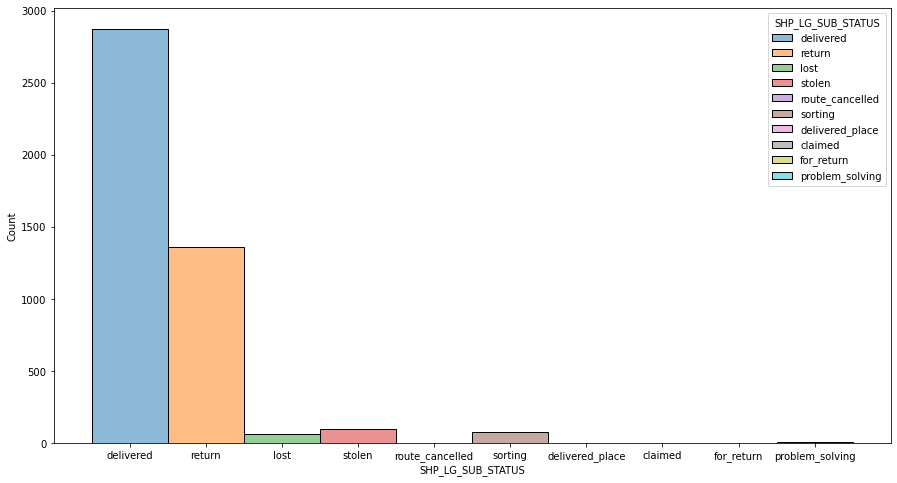

In [63]:
plot.figure(figsize = (15,8))
ax = sns.histplot(data=df, x=df['SHP_LG_SUB_STATUS'], hue=df['SHP_LG_SUB_STATUS'])

<AxesSubplot:xlabel='SHP_LG_CALCULATED_DISTANCE', ylabel='Density'>

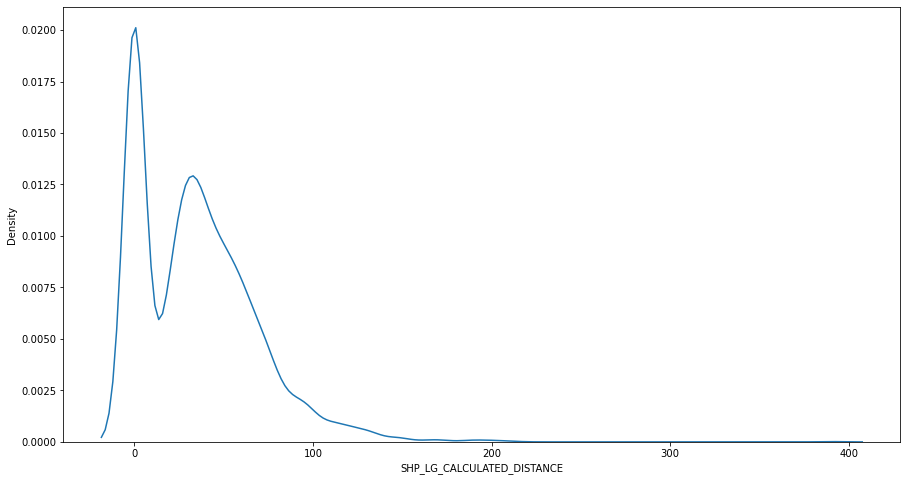

In [64]:
plot.figure(figsize = (15,8))
distance = df[df['SHP_LG_CALCULATED_DISTANCE'] < 1000]
sns.kdeplot(data=distance, x=distance['SHP_LG_CALCULATED_DISTANCE'])

<AxesSubplot:xlabel='SHP_ORDER_COST_USD', ylabel='Count'>

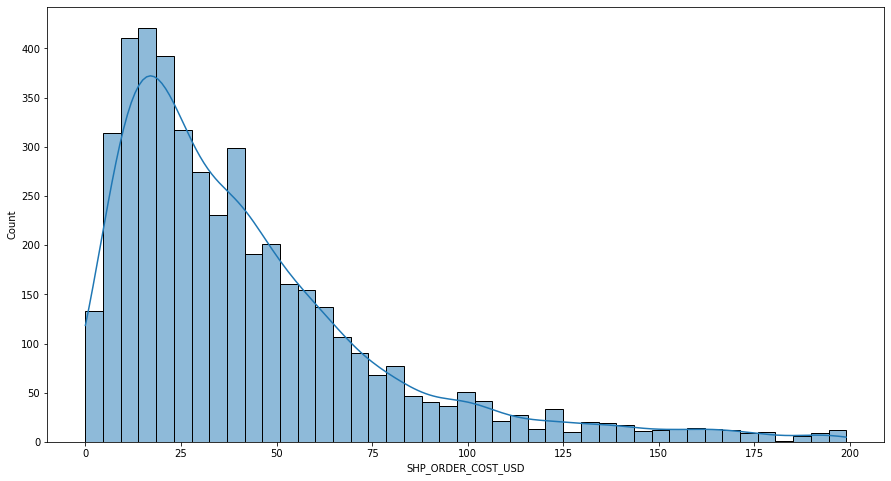

In [65]:
plot.figure(figsize = (15,8))
df = df[df['SHP_ORDER_COST_USD'] < 200]
sns.histplot(data=df, x=df['SHP_ORDER_COST_USD'] , kde=True)